In [25]:
input_vector = [1.72, 1.23]
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]

first_indexes_mult = input_vector[0] * weights_1[0]
second_indexes_mult = input_vector[1] * weights_1[1]
dot_product_1 = first_indexes_mult + second_indexes_mult

print(f'The dot product is: {dot_product_1}')

The dot product is: 2.1672


In [26]:
import numpy as np

In [27]:
dot_product_1 = np.dot(input_vector, weights_1)

print(f'The dot product is: {dot_product_1}')

The dot product is: 2.1672


In [28]:
dot_product_2 = np.dot(input_vector, weights_2)

print(f'The dot product is: {dot_product_2}')

The dot product is: 4.1259999999999994


In [29]:
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def make_prediction(input_vector, weights, bias):
    layer_1 = np.dot(input_vector, weights) + bias
    layer_2 = sigmoid(layer_1)
    return layer_2

prediction = make_prediction(input_vector, weights_1, bias)

print(f'The prediction result is: {prediction}')

The prediction result is: [0.7985731]


In [30]:
input_vector = np.array([2, 1.5])

prediction = make_prediction(input_vector, weights_1, bias)

print(f'The prediction result is: {prediction}')

The prediction result is: [0.87101915]


In [31]:
target = 0

mse = np.square(prediction - target)

print(f'Prediction: {prediction}; Error: {mse}')

Prediction: [0.87101915]; Error: [0.75867436]


In [32]:
derivative = 2 * (prediction - target)

print(f'The derivative is: {derivative}')

The derivative is: [1.7420383]


In [33]:
weights_1 = weights_1 - derivative

prediction = make_prediction(input_vector, weights_1, bias)

error = np.square(prediction - target)

print(f'Prediction: {prediction}; Error: {error}')

Prediction: [0.01496248]; Error: [0.00022388]


In [34]:
input_vector = np.array([1.66, 1.56])

prediction = make_prediction(input_vector, weights_1, bias)

error = np.square(prediction - target)

print(f'Prediction: {prediction}; Error: {error}')

Prediction: [0.01431593]; Error: [0.00020495]


In [40]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            derror_dbias, derror_dweights = self._compute_gradients(input_vector, target)

            self._update_parameters(derror_dbias, derror_dweights)

            if current_iteration % 100 == 0:
                cumulative_error = 0
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

In [36]:
input_vector = np.array([2, 1.5])
learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

neural_network.predict(input_vector)

0.47074512292204085

In [59]:
import matplotlib.pyplot as plt

input_vectors = np.array([[3, 1.5], [2, 1], [4, 1.5], [3, 4], [3.5, 0.5], [2, 0.5], [5.5, 1], [1, 1]])

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors, targets, 10000)

Text(0, 0.5, 'Error for all training instances')

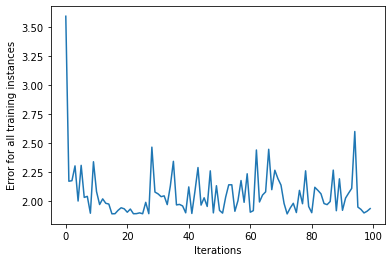

In [60]:
plt.plot(training_error)
plt.xlabel('Iterations')
plt.ylabel('Error for all training instances')